# K Means Clustering - Simple Example

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.
___

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

In [4]:
#Data Imports
df = pd.read_csv('College_Data', index_col=0)

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Minor Data Cleansing

Notice how there seems to be a private school with a graduation rate of higher than 100%. This needs to be found and altered.

In [22]:
#Find the error
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,110


In [23]:
#Set that school's graduation rate to 100 (error is ok)
df['Grad.Rate']['Cazenovia College'] = 100

C:\Users\kaled\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## K Means Cluster Creation

Now it is time to create the Cluster labels!

In [29]:
#Import Library
from sklearn.cluster import KMeans

In [30]:
#Create object, set to 2 clusters
kmeans = KMeans(n_clusters=2)

In [31]:
#Fit Model
kmeans.fit(df.drop('Private',axis=1))

KMeans(n_clusters=2)

#### From here we can return the center of the clusters that are predicted from the fit model

In [32]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

#### Now we can plot those

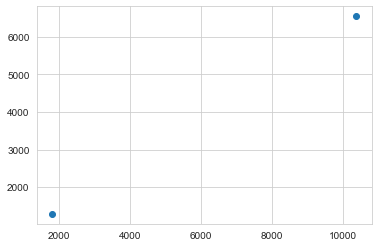

In [12]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])

## Evaluation of model

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters.

Since we can't compare the Yes/No string in the Private column, we're simply going to create a new column called "Cluster" that changes that to a flag of 0/1 (0 if Private, 1 if Public)

In [34]:
def checker(private):
    if private=='Yes':
        return 1
    else:
        return 0

df['Cluster'] = df['Private'].apply(checker)

In [35]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [36]:
#Create confusion matrix and classification report, comparing the new columns to the KMeans Labels (predicted Private/Public)
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups! Hopefully you can begin to see how K Means is useful for clustering un-labeled data!

### Visualize some of these predicted values against actual

At this level, you can see the difficulty of attempting to classify these points. I'm comparing the predicted Private/Public value against the KMeans predicted labels for several pairs of attributes

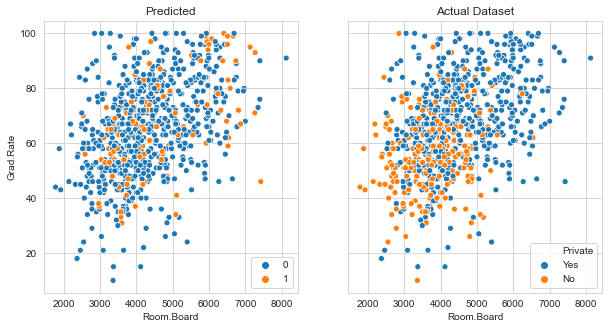

In [37]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

ax[0].set_title("Predicted")
ax[1].set_title("Actual Dataset")

sns.scatterplot(y='Grad.Rate', x='Room.Board', data=df, hue=kmeans.labels_, ax=ax[0])
sns.scatterplot(y='Grad.Rate', x='Room.Board', data=df, hue='Private', ax=ax[1])

ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')

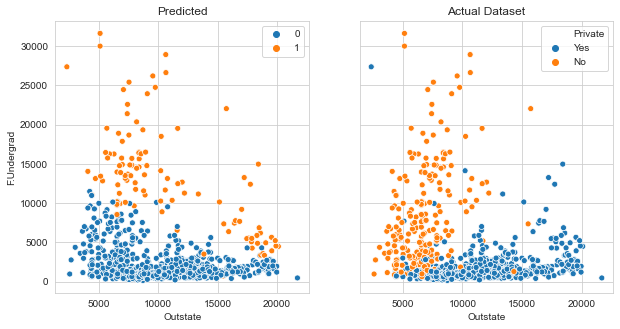

In [38]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

ax[0].set_title("Predicted")
ax[1].set_title("Actual Dataset")

sns.scatterplot(y="F.Undergrad", x="Outstate", data=df, hue=kmeans.labels_, ax=ax[0])
sns.scatterplot(y="F.Undergrad", x="Outstate", data=df, hue='Private', ax=ax[1])